<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Hands-on Lab : Web Scraping**


Estimated time needed: **30 to 45** minutes


## Objectives


In this lab you will perform the following:


* Extract information from a given web site 
* Write the scraped data into a csv file.


## Extract information from the given web site
You will extract the data from the below web site: <br> 


In [8]:
#this url contains the data you need to scrape
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html"

The data you need to scrape is the **name of the programming language** and **average annual salary**.<br> It is a good idea to open the url in your web broswer and study the contents of the web page before you start to scrape.


Import the required libraries


In [11]:
# Your code here
from bs4 import BeautifulSoup
import pandas as pd
import requests

Download the webpage at the url


In [13]:
#your code goes here
data = requests.get(url).text

Create a soup object


In [15]:
#your code goes here
soup = BeautifulSoup(data, 'html5lib')

Scrape the `Language name` and `annual average salary`.


In [79]:
#your code goes here
languages = []
salaries = []

table = soup.find("table")

for row in table.find_all("tr")[1:]:
    cols = row.find_all("td")
    language = cols[1].text
    salary = cols[3].text
    languages.append(language)
    salaries.append(salary)
    
salaries = [float(salary.replace(',', '').replace('$', '')) for salary in salaries]

     Language  Average Annual Salary
0      Python               114383.0
1        Java               101013.0
2           R                92037.0
3  Javascript               110981.0
4       Swift               130801.0
5         C++               113865.0
6          C#                88726.0
7         PHP                84727.0
8         SQL                84793.0
9          Go                94082.0


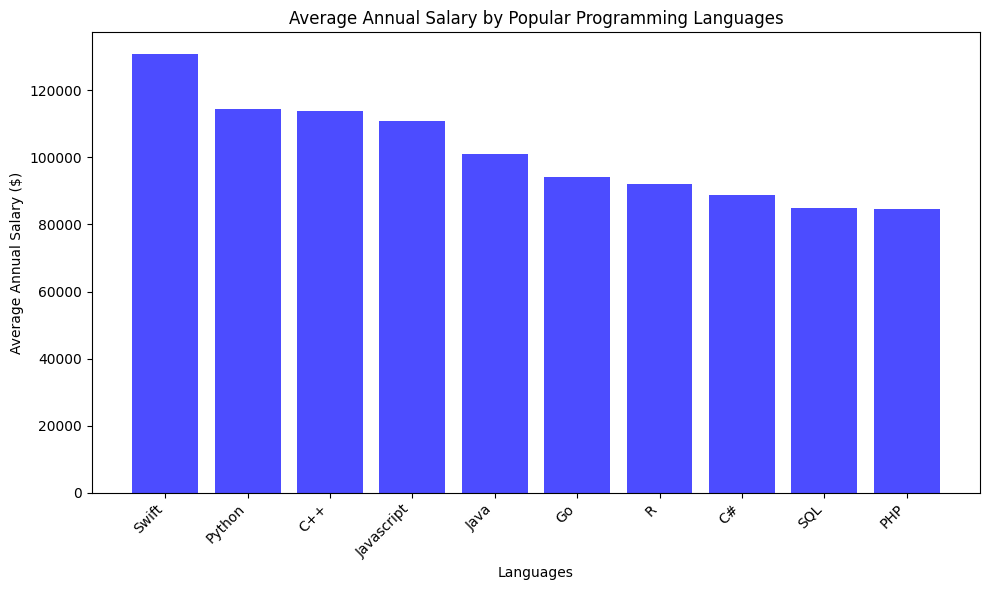

In [88]:
import matplotlib.pyplot as plt

# Create a DataFrame from the lists
data = {
    "Language": languages,
    "Average Annual Salary": salaries
}
df = pd.DataFrame(data)
print(df)
# Sort the DataFrame by 'Average Annual Salary' in descending order
df_sorted = df.sort_values(by='Average Annual Salary', ascending=False)

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(df_sorted['Language'], df_sorted['Average Annual Salary'], color='blue', alpha=0.7)

# Customize the chart
plt.xlabel('Languages')
plt.ylabel('Average Annual Salary ($)')
plt.title('Average Annual Salary by Popular Programming Languages')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save the chart as a PNG file
plt.savefig('avg_salary.png', dpi=300)

# Show the chart
plt.show()

Save the scrapped data into a file named *popular-languages.csv*


In [ ]:
# your code goes here
df.to_csv('popular-languages.csv', index=False)

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2020-10-17  | 0.1  | Ramesh Sannareddy  |  Created initial version of the lab |


 Copyright &copy; 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01).
